In [ ]:
!pip install easyocr

In [ ]:
!pip uninstall opencv-python-headless


Found existing installation: opencv-python-headless 4.1.2.30
Uninstalling opencv-python-headless-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtCore-bbdab771.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtGui-903938cd.so.4.8.7
    /usr/local/lib/python3.7/dist-packages/cv2/.libs/libQtTest-1183da5d.so.4.8.7
Proceed (y/n)? y
  Successfully uninstalled opencv-python-headless-4.1.2.30


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  Using cached opencv_python_headless-4.1.2.30-cp37-cp37m-manylinux1_x86_64.whl (21.8 MB)


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from pathlib import Path


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f969624c5f0> (for post_execute):


KeyboardInterrupt: ignored

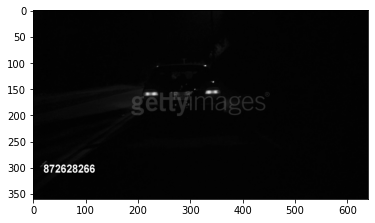

In [ ]:
cap=cv2.VideoCapture('/content/gettyimages-872628266-640_adpp.mp4')
i = 0
while(cap.isOpened()):
    ret, frame = cap.read()
     
    # This condition prevents from infinite looping
    # incase video ends.
    if ret == False:
        break
     
    # Save Frame by Frame into disk using imwrite method
    cv2.imwrite('Frame'+str(i)+'.jpg', frame)
    img=frame
    i += 1
    
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))
  


In [ ]:
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
  edged = cv2.Canny(bfilter, 30, 200) #Edge detection
  plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
  location = None
  for contour in contours:
     approx = cv2.approxPolyDP(contour, 10, True)
     if len(approx) == 4:
         location = approx
         break

In [ ]:
 location

In [ ]:
 mask = np.zeros(gray.shape, np.uint8)
 new_image = cv2.drawContours(mask, [location], 0,255, -1)
 new_image = cv2.bitwise_and(img, img, mask=mask)

In [ ]:

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]


In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=4, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cap.release()
cv2.destroyAllWindows()